## Call Logger Analytics ##

### ELT and Aggregation Functions ###

In [2]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 17.6 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 KB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 20.3 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
call_df=pd.read_csv("../data/calllog.csv",low_memory=False, header=None)
# header=None, Low_memory=False

In [10]:
call_df

,0,1,2,3,4
0,2019-01-28 19:54:44,6336,6245,0,FAILED
1,2019-01-28 19:54:13,812570342,6205,35,ANSWERED
2,2019-01-28 19:52:58,2436,6688,120,ANSWERED
3,2019-01-28 19:54:40,7101,7204,22,ANSWERED
4,2019-01-28 19:55:24,5716,2883,0,BUSY
...,...,...,...,...,...
1804308,2022-06-22 16:33:20,0706500760,6211,28,NO ANSWER
1804309,2022-06-22 16:40:00,0706500760,6211,28,NO ANSWER
1804310,2022-06-22 16:43:01,0706500760,6211,28,NO ANSWER
1804311,2022-06-22 16:52:20,2345,6235,30,NO ANSWER


In [12]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804313 entries, 0 to 1804312
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       object
 1   1       object
 2   2       object
 3   3       int64 
 4   4       object
dtypes: int64(1), object(4)
memory usage: 68.8+ MB


In [16]:
column_names=['date_time','source','destination','duration','status']
call_df.columns=column_names
call_df.head(5)
#call_df.tail(5)

,date_time,source,destination,duration,status
0,2019-01-28 19:54:44,6336,6245,0,FAILED
1,2019-01-28 19:54:13,812570342,6205,35,ANSWERED
2,2019-01-28 19:52:58,2436,6688,120,ANSWERED
3,2019-01-28 19:54:40,7101,7204,22,ANSWERED
4,2019-01-28 19:55:24,5716,2883,0,BUSY


### Dimension ###

In [19]:
print(call_df.shape)
print(len(call_df.index))
r,_ = call_df.shape
print('Numver of raws = ' + str(r))

(1804313, 5)
1804313
Numver of raws = 1804313


### Missing Value Management ###

In [22]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 734.3 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 17.6 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


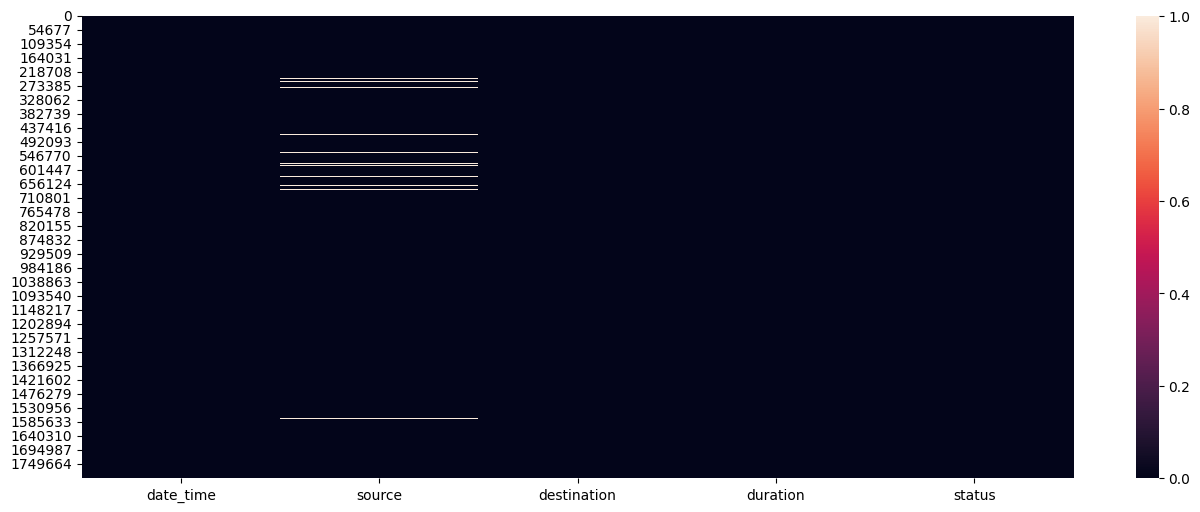

In [23]:
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(16,6)) #inch
sns.heatmap(call_df.isnull())
plt.show()

In [25]:
call_df.isnull().sum()

date_time          0
source         51302
destination      263
duration           0
status             0
dtype: int64

In [ ]:
#call_df.dropna(axis=0)

In [26]:
call_df.dropna(axis=0, inplace=True)

In [27]:
call_df.isnull().sum()

date_time      0
source         0
destination    0
duration       0
status         0
dtype: int64

In [29]:
call_df.shape

(1752748, 5)

### Primary Observations ###

#### Maximum Duration ####

In [30]:
call_df.duration.max()

1731976

In [32]:
call_df['duration'].min()

0

In [34]:
call_df.duration.nlargest(5,keep='first')

18110     1731976
132982    1529973
688718    1120344
217305     861584
237594     560156
Name: duration, dtype: int64

In [35]:
call_df[call_df.duration== call_df.duration.max()]

,date_time,source,destination,duration,status
18110,2019-01-24 00:05:18,2001,6276,1731976,ANSWERED


In [36]:
call_df[call_df.duration > 10800]

,date_time,source,destination,duration,status
18110,2019-01-24 00:05:18,2001,6276,1731976,ANSWERED
18116,2019-02-12 20:51:06,2001,6250,15752,ANSWERED
21393,2019-02-14 11:26:54,2001,2889,80912,ANSWERED
81142,2019-04-05 08:39:32,2000,6688,76205,ANSWERED
132982,2019-05-08 16:09:42,2000,6562,1529973,ANSWERED
217305,2019-07-09 14:04:56,2000,6212,861584,ANSWERED
237594,2019-07-26 09:43:09,2000,6688,560156,ANSWERED
347753,2019-10-31 11:54:16,2000,6688,79531,ANSWERED
365653,2019-11-08 09:14:46,4284,4212,13851,ANSWERED
541381,2019-12-30 09:59:22,2001,2889,29813,ANSWERED


#### List categorical values

In [37]:
call_df.status.unique()

array(['FAILED', 'ANSWERED', 'BUSY', 'NO ANSWER'], dtype=object)

In [38]:
call_df.status.value_counts()

FAILED       653922
NO ANSWER    597692
ANSWERED     431871
BUSY          69263
Name: status, dtype: int64

### Manage exceptional (outlier) values

<AxesSubplot:title={'center':'duration'}, xlabel='status'>

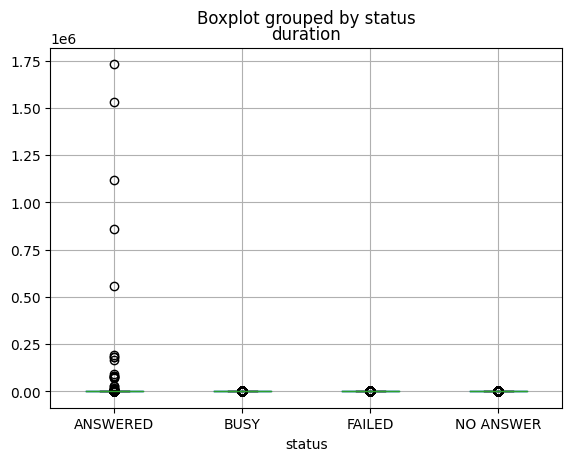

In [40]:
call_df.boxplot(by='status', column=['duration'], grid=True)

In [47]:
q_low= call_df["duration"].quantile(0.01)
q_hi= call_df["duration"].quantile(0.99)
print("lower value: " +str(q_low))
print("higher value: " +str(q_hi))
df_1= call_df[(call_df["status"].str.contains('ANSWERED')==True) \
              & (call_df["duration"] < q_hi) & (call_df["duration"] > q_low)]
df_2= call_df[(call_df["status"].str.contains('ANSWERED')==False)]
call_df=df_1.merge(df_2, how='outer')

lower value: 0.0
higher value: 193.0


In [46]:
call_df

,date_time,source,destination,duration,status
0,2019-01-28 19:54:13,812570342,6205,35,ANSWERED
1,2019-01-28 19:52:58,2436,6688,120,ANSWERED
2,2019-01-28 19:54:40,7101,7204,22,ANSWERED
3,2019-01-28 19:55:07,6336,6246,109,ANSWERED
4,2019-01-28 19:55:53,5011,5023,88,ANSWERED
...,...,...,...,...,...
1734992,2022-06-22 16:26:01,2409,6211,90,NO ANSWER
1734993,2022-06-22 16:33:20,0706500760,6211,28,NO ANSWER
1734994,2022-06-22 16:40:00,0706500760,6211,28,NO ANSWER
1734995,2022-06-22 16:43:01,0706500760,6211,28,NO ANSWER


<AxesSubplot:title={'center':'duration'}, xlabel='status'>

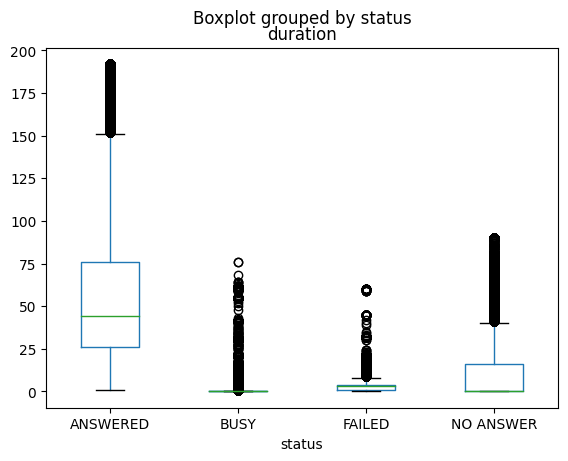

In [48]:
call_df.boxplot(by='status', column=['duration'], grid=False)

array([[<AxesSubplot:title={'center':'ANSWERED'}>,
        <AxesSubplot:title={'center':'BUSY'}>],
       [<AxesSubplot:title={'center':'FAILED'}>,
        <AxesSubplot:title={'center':'NO ANSWER'}>]], dtype=object)

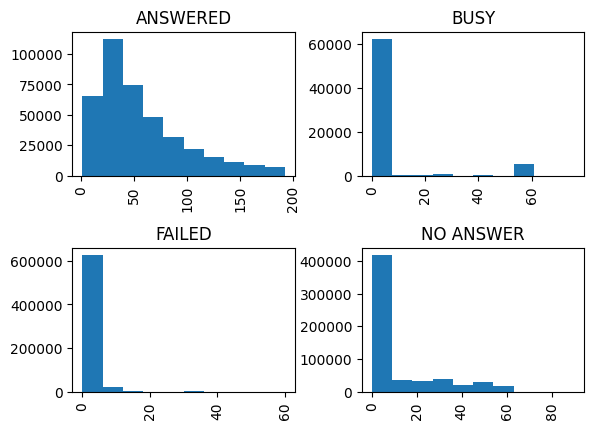

In [49]:
call_df.hist(column ='duration', by='status')

In [51]:
call_df[call_df.source=='7101'].sort_values('duration').tail(10)

,date_time,source,destination,duration,status
55551,2019-06-13 14:48:30,7101,7385,190,ANSWERED
224870,2021-01-13 11:30:04,7101,2409,190,ANSWERED
247237,2021-03-08 11:10:47,7101,7150,190,ANSWERED
177724,2020-09-04 11:59:45,7101,7501,191,ANSWERED
173615,2020-08-25 08:48:45,7101,7511,191,ANSWERED
368654,2022-04-07 15:06:00,7101,7150,191,ANSWERED
240935,2021-02-18 14:42:59,7101,7150,192,ANSWERED
129772,2020-01-17 09:14:20,7101,7204,192,ANSWERED
248263,2021-03-09 15:11:58,7101,7343,192,ANSWERED
329125,2022-01-07 09:12:23,7101,7150,192,ANSWERED


In [52]:
call_df.sort_values(by=['duration'], ascending=False)

,date_time,source,destination,duration,status
39675,2019-05-10 09:16:10,3911,2413,192,ANSWERED
48550,2019-05-30 14:03:30,718162530,6240,192,ANSWERED
122316,2019-12-31 10:38:56,4097,4026,192,ANSWERED
370685,2022-04-19 15:37:50,2360,7150,192,ANSWERED
136030,2020-01-31 09:16:38,2805,3991,192,ANSWERED
...,...,...,...,...,...
1300786,2021-05-03 21:39:07,5414,6121,0,NO ANSWER
1300785,2021-05-03 21:39:06,5414,6121,0,NO ANSWER
1300784,2021-05-03 21:39:06,5414,6121,0,NO ANSWER
1300783,2021-05-03 21:39:06,5414,6121,0,NO ANSWER


In [53]:
call_df.duration.describe()

count    1.717450e+06
mean     1.777694e+01
std      3.092308e+01
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      2.400000e+01
max      1.920000e+02
Name: duration, dtype: float64

In [54]:
call_df.groupby('status').count()

,date_time,source,destination,duration
status,,,,
ANSWERED,396573,396573,396573,396573
BUSY,69263,69263,69263,69263
FAILED,653922,653922,653922,653922
NO ANSWER,597692,597692,597692,597692


### Verify duplicates

In [55]:
call_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1717445    False
1717446    False
1717447    False
1717448    False
1717449    False
Length: 1717450, dtype: bool

In [56]:
call_df.duplicated().sum()

921847

### Find column based duplicates

In [57]:
call_df['date_time'].duplicated().sum()

978612

### transform

In [58]:
call_df['date_time']=pd.to_datetime(call_df['date_time'])

In [59]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1717450 entries, 0 to 1717449
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date_time    datetime64[ns]
 1   source       object        
 2   destination  object        
 3   duration     int64         
 4   status       object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 78.6+ MB


In [60]:
call_df['date_time'].duplicated().sum()

978612

In [61]:
call_df.duplicated(subset=['date_time','source','destination']).sum()

964662

In [63]:
call_df(call_df.duplicated(subset=['date_time','source','destination'])).head(10)

TypeError: 'DataFrame' object is not callable

In [64]:
call_df.drop_duplicates(keep='first', inplace=True)

In [65]:
call_df.shape

(795603, 5)

<AxesSubplot:title={'center':'duration'}, xlabel='status'>

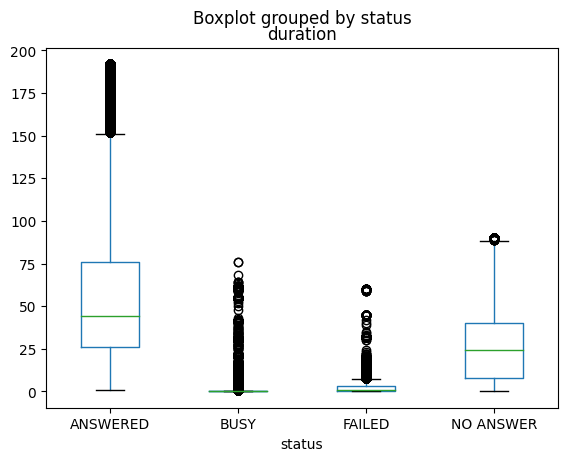

In [66]:
call_df.boxplot(by='status', column=['duration'], grid=False)

In [68]:
call_df.duplicated(subset=['date_time','source','destination']).sum()

42815

In [69]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795603 entries, 0 to 1717449
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date_time    795603 non-null  datetime64[ns]
 1   source       795603 non-null  object        
 2   destination  795603 non-null  object        
 3   duration     795603 non-null  int64         
 4   status       795603 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 36.4+ MB


In [70]:
call_df[call_df['date_time'].duplicated()].sum()

/tmp/ipykernel_47/3593937382.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  call_df[call_df['date_time'].duplicated()].sum()


source         6510444463867101620534712473812234016504862357...
destination    6210656564907204626239117127654052306470720224...
duration                                                  632902
status         ANSWEREDANSWEREDANSWEREDANSWEREDANSWEREDANSWER...
dtype: object

### Groupby

In [71]:
call_df.groupby(['source','destination']).size()

source       destination
0            4226            1
             4228            3
             4255            1
             4284           12
             6471            1
                            ..
anonymous    6980            8
             6985            8
             6998            8
             6999            9
prasannaliy  4614            2
Length: 90769, dtype: int64

In [72]:
monthly_data=call_df.groupby(call_df['date_time'].dt.month)['duration'].sum()

In [73]:
monthly_data

date_time
1     2968478
2     3218557
3     3304895
4     2114378
5     2308472
6     2193349
7     2084403
8     2007256
9     1514714
10    2343203
11    2363711
12    2391435
Name: duration, dtype: int64

In [74]:
call_df['month']=call_df.date_time.dt.month

In [75]:
call_df['day_name']=call_df.date_time.dt.day_of_week

In [ ]:
call_df[(call_df['status']== BUSSY)].month.value_counts().sort-IND